In [26]:
# Importação das bibliotecas necessárias.
# pandas para manipulação de dados em formato de DataFrame.
# numpy para operações numéricas, especialmente com arrays.
# pickle para serializar e desserializar objetos Python, usado aqui para carregar os datasets.
# LogisticRegression do scikit-learn para implementar o modelo de regressão logística.
# accuracy_score e classification_report para avaliar o desempenho do modelo.
# ConfusionMatrix da yellowbrick para visualização da matriz de confusão.
# matplotlib.pyplot para funções de plotagem, como salvar gráficos.
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt


In [27]:
# Carregamento do dataset 'risco_credito.pkl'.
# Este arquivo contém os dados de entrada (X_risco_credito) e as classes/alvos (y_risco_credito)
# para o problema de risco de crédito. O 'rb' indica que o arquivo será aberto em modo de leitura binária.
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [28]:
# Exibição dos dados de entrada (features) do dataset de risco de crédito.
# Isso ajuda a entender a estrutura e os valores das variáveis de entrada.
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [29]:
# Exibição dos dados de saída (alvos/classes) do dataset de risco de crédito.
# Essas são as categorias que o modelo tentará prever ('baixo', 'moderado', 'alto').
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [30]:
# Pré-processamento específico para o dataset de risco de crédito.
# As linhas com índices 2, 7 e 11 estão sendo removidas - "moderado".
X_risco_credito = np.delete(X_risco_credito, [2,7,11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2,7,11], axis=0)

In [31]:
# Verificação dos dados de entrada após a remoção das linhas.
# Confirma que as linhas especificadas foram removidas de X.
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [32]:
# Verificação dos dados de saída (alvos) após a remoção das linhas correspondentes.
# É crucial que X e y tenham o mesmo número de amostras após qualquer pré-processamento.
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [33]:
# Criação e treinamento do modelo de Regressão Logística para o dataset de risco de crédito.
# random_state=1 garante que os resultados sejam reproduzíveis.
# O método .fit() é usado para treinar o modelo com os dados de entrada (X) e os alvos (y).
lg_risco_credito = LogisticRegression(random_state=1)
lg_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [34]:
# Exibição do intercepto (B0) do modelo de regressão logística.
# O intercepto é o valor da saída do modelo quando todas as features de entrada são zero.
lg_risco_credito.intercept_

array([-0.80855152])

In [35]:
# Exibição dos coeficientes (B1, B2, B3, B4...) do modelo de regressão logística.
# Cada coeficiente representa a importância de uma feature no modelo.
# O sinal (positivo/negativo) indica a direção da relação com a classe de saída.
lg_risco_credito.coef_

array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]])

In [36]:
# Realização de previsões com o modelo 'lg_risco_credito'.
# Os inputs são arrays bidimensionais, onde cada linha representa uma nova amostra para prever.
# Exemplo 1: História boa(0), dívida ruim(0), garantias nenhuma(1), renda >35(2)
# Exemplo 2: História ruim(2), dívida alta(0), garantias adequada(0), renda <15(0)
previsoes1 = lg_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

In [37]:
# Carregamento do dataset 'credit.pkl'.
# Este arquivo já vem com os dados divididos em conjuntos de treinamento e teste,
# o que é uma boa prática para avaliar a performance do modelo em dados não vistos.
with open('credit.pkl', 'rb') as f:
    X_credito_treinamento, y_credito_treinamento, X_credito_teste, y_credito_teste = pickle.load(f)


In [38]:
# Criação e treinamento do modelo de Regressão Logística para o dataset de crédito.
# O treinamento é feito apenas com o conjunto de treinamento (X_credito_treinamento, y_credito_treinamento).
lg_credito = LogisticRegression(random_state=1)
lg_credito.fit(X_credito_treinamento, y_credito_treinamento)

LogisticRegression(random_state=1)

In [39]:
# Exibição do intercepto (B0) do modelo de regressão logística treinado com o dataset de crédito.
lg_credito.intercept_

array([-6.03333114])

In [40]:
# Exibição dos coeficientes (B1, B2, B3) do modelo de regressão logística treinado com o dataset de crédito.
lg_credito.coef_

array([[-2.55275554, -3.72391763,  3.94333319]])

In [41]:
# Realização de previsões no conjunto de teste para o dataset de crédito.
# O modelo faz previsões sobre os dados que ele nunca viu durante o treinamento.
previsoes_credito = lg_credito.predict(X_credito_teste)
previsoes_credito

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
# Exibição dos valores reais (ground truth) do conjunto de teste para o dataset de crédito.
# Isso será comparado com as 'previsoes_credito' para calcular as métricas de desempenho.
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
# Cálculo da acurácia do modelo de crédito.
# A acurácia mede a proporção de previsões corretas em relação ao total de previsões.
accuracy_score(y_credito_teste, previsoes_credito)

0.946

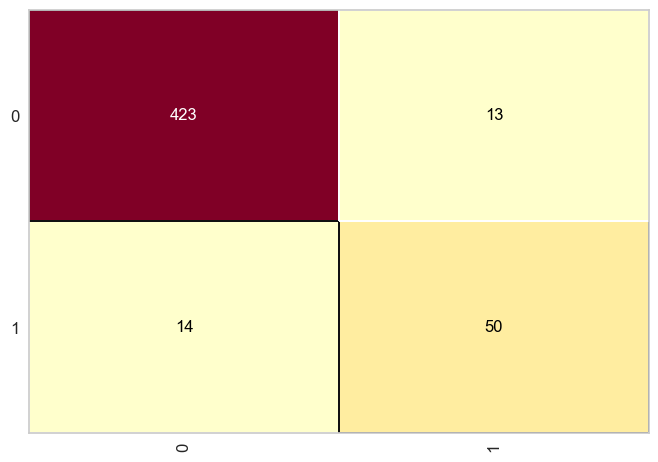

In [44]:
# Geração e plotagem da Matriz de Confusão para o modelo de crédito usando Yellowbrick.
# A matriz de confusão ajuda a visualizar os acertos e erros do modelo, separando
# True Positives, True Negatives, False Positives e False Negatives.
# O método .fit() treina o visualizador, e .score() calcula as métricas no conjunto de teste e plota.
# cm.show() exibe o gráfico.
# plt.savefig() salva o gráfico como uma imagem para inclusão no README.
# plt.close() fecha a figura para liberar recursos.
cm = ConfusionMatrix(lg_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)
plt.savefig('confusion_matrix_credit.png')

In [45]:
# Impressão do relatório de classificação para o modelo de crédito.
# Este relatório fornece métricas mais detalhadas por classe:
# - Precision: Proporção de verdadeiros positivos entre todos os positivos previstos.
# - Recall: Proporção de verdadeiros positivos entre todos os positivos reais.
# - F1-score: Média harmônica de precisão e recall.
# - Support: Número de ocorrências de cada classe no conjunto de teste.
print(classification_report(y_credito_teste, previsoes_credito))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



In [46]:
# Carregamento do dataset 'census.pkl'.
# Assim como o 'credit.pkl', já vem com os dados divididos em treinamento e teste.
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [47]:
# Criação e treinamento do modelo de Regressão Logística para o dataset do censo.
# O modelo é treinado usando os dados de treinamento do censo.
lg_census = LogisticRegression(random_state=1)
lg_census.fit(X_census_treinamento, y_census_treinamento)


LogisticRegression(random_state=1)

In [48]:
# Realização de previsões no conjunto de teste para o dataset do censo.
previsoes_census = lg_census.predict(X_census_teste)
previsoes_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      shape=(4885,), dtype=object)

In [49]:
# Exibição dos valores reais (ground truth) do conjunto de teste para o dataset do censo.
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      shape=(4885,), dtype=object)

In [50]:
# Cálculo da acurácia do modelo do censo.
accuracy_score(y_census_teste, previsoes_census)

0.8497441146366428

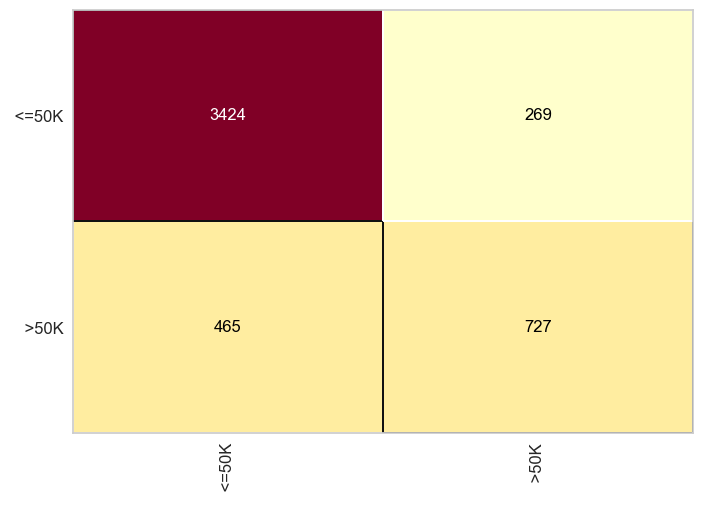

In [51]:
# Geração e plotagem da Matriz de Confusão para o modelo do censo.
# Similar ao processo para o dataset de crédito, para visualizar o desempenho do modelo do censo.
cm = ConfusionMatrix(lg_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)
plt.savefig('confusion_matrix_census.png')

In [52]:
# Impressão do relatório de classificação para o modelo do censo, mostrando precisão, recall e F1-score por classe.
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

